In [27]:
#importing all the required libraries 

# load some default Python modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.style.use('seaborn-whitegrid')
import io

import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


# Downloading Data:

In [5]:
import requests

url = "https://raw.githubusercontent.com/surabhigovil/Deep_learning_assignments_Spring_2021/master/Assignment5/train_subset.csv" 
download = requests.get(url).content

subset_train = pd.read_csv(io.StringIO(download.decode('utf-8')))

subset_train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
url = "https://raw.githubusercontent.com/surabhigovil/Deep_learning_assignments_Spring_2021/master/Assignment5/ny_taxi_test.csv" 
download_test = requests.get(url).content

test = pd.read_csv(io.StringIO(download_test.decode('utf-8')))

test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
subset_train.nunique()

Unnamed: 0           50000
key                  50000
fare_amount            703
pickup_datetime      49555
pickup_longitude     33728
pickup_latitude      36609
dropoff_longitude    34893
dropoff_latitude     37428
passenger_count          7
dtype: int64

In [8]:
# delete the fares that are less than 0
subset_train = subset_train.loc[subset_train.fare_amount > 0]
subset_train.fare_amount.min()

0.01

In [9]:
#distribution of data 
subset_train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000
mean,24999.786962,11.366585,-72.509497,39.933614,-72.505832,39.926919,1.667900
std,14433.564520,9.684734,10.394778,6.225408,10.403437,6.012618,1.289241
min,0.000000,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,12500.500000,6.000000,-73.992062,40.734881,-73.991152,40.734375,1.000000
50%,24999.000000,8.500000,-73.981840,40.752679,-73.980082,40.753372,1.000000
75%,37499.500000,12.500000,-73.967154,40.767359,-73.963586,40.768166,2.000000
max,49999.000000,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [10]:
train_X = subset_train.drop(columns=['fare_amount'])
Y = subset_train.fare_amount

#Y = df_train['fare_amount']
test_X = test

In [15]:
df = train_X.append(test_X,sort=False) #stacking

# Helper Function to caluclate Haversine Distance:

In [11]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 3958.75  # average radius of Earth 
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

# Preprocessing:

In [16]:
df['dist_miles'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_miles
0,0.0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640486
1,1.0,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250662
2,2.0,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863410
3,3.0,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739383
4,4.0,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242217


In [21]:
subset_train['EDTdate'] = pd.to_datetime(subset_train['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
subset_train['Hour'] = subset_train['EDTdate'].dt.hour
subset_train['AMorPM'] = np.where(subset_train['Hour']<12,'am','pm')
subset_train['Weekday'] = subset_train['EDTdate'].dt.strftime("%a")
subset_train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21,13,pm,Mon
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 12:52:16,12,pm,Tue
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00,20,pm,Wed
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42,0,am,Sat
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 03:51:00,3,am,Tue


In [25]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']

In [28]:
#casting the cat categories as "category" and label encoding it.
for col in subset_train.columns:
  if col in cat_cols:
    subset_train[col] = LabelEncoder().fit_transform(subset_train[col])
    subset_train[col]= subset_train[col].astype('category')

# EDA

Text(0, 0.5, 'Frequency')

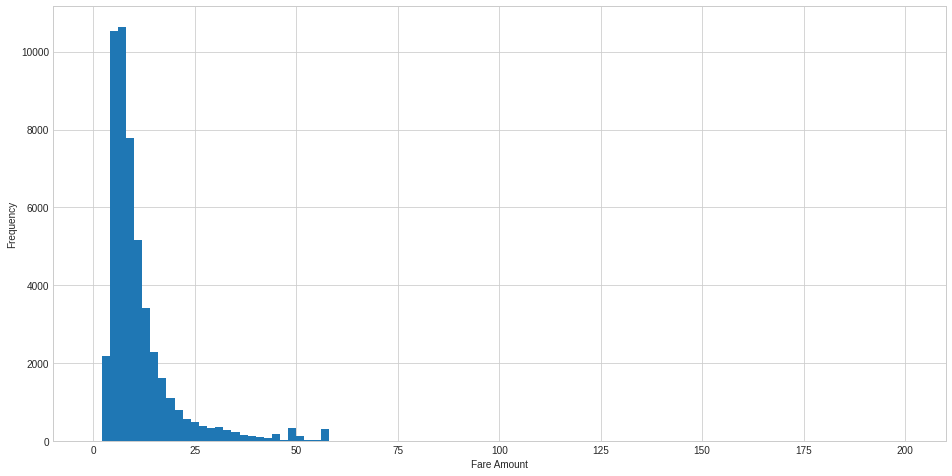

In [19]:
##Distribution of Fare
# Lets see the distribution of fare amount 
subset_train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

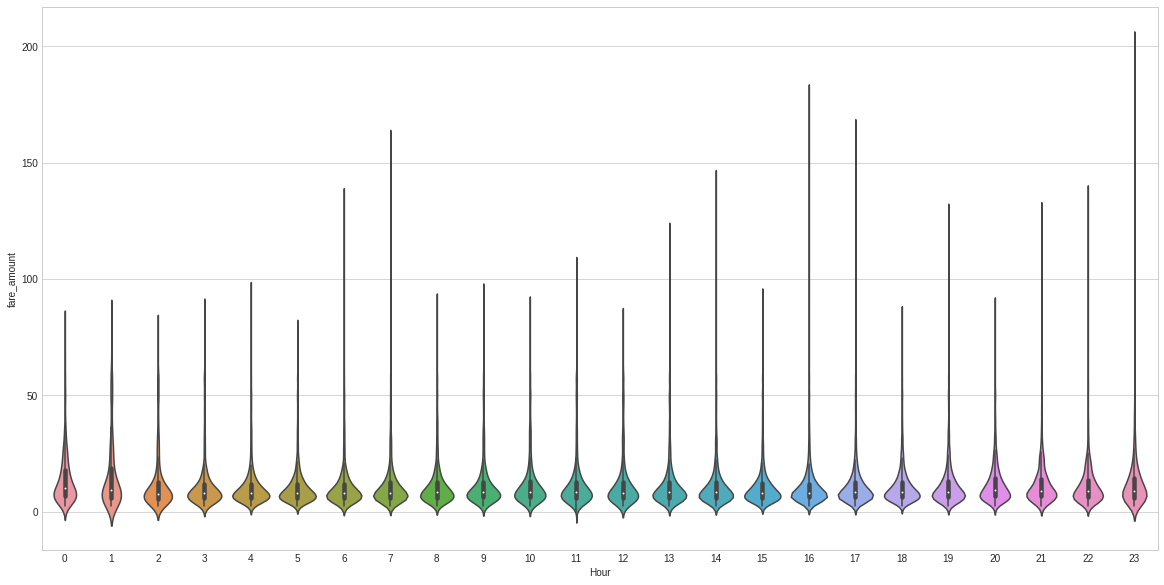

In [22]:
#visulaizing how fares vary based on trip start hour
plt.figure(figsize=(20, 10))
sns.violinplot(x=subset_train['Hour'].astype(int), y=subset_train['fare_amount'])

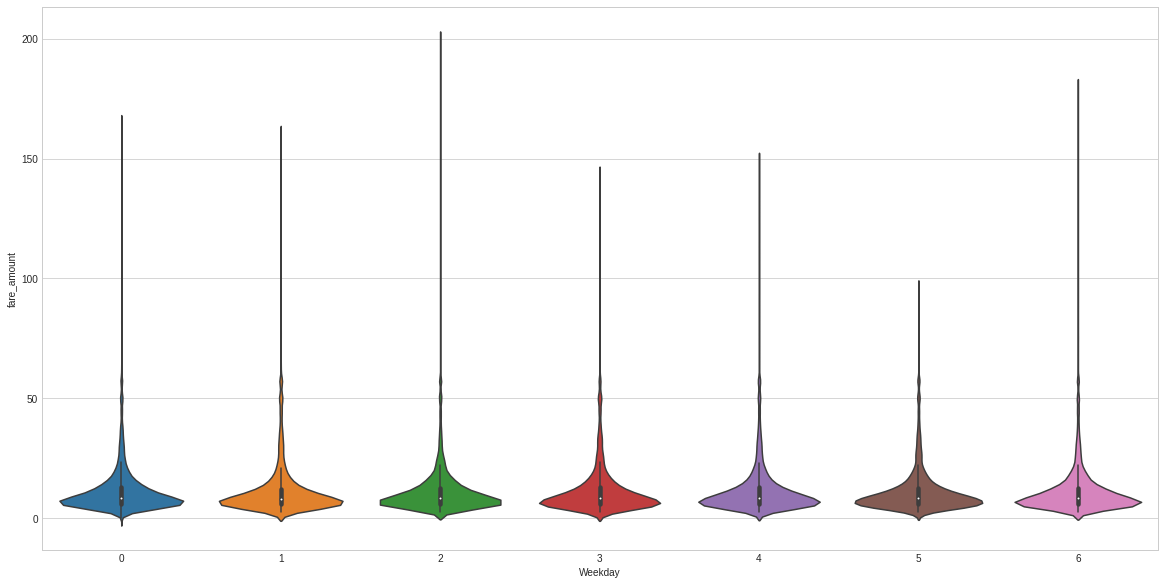

In [29]:
#visulaizing how fares vary based on trip start day, weekends have higher fare like in plot below
plt.figure(figsize=(20, 10))
sns.violinplot(x=subset_train['Weekday'].astype(int), y=subset_train['fare_amount'])

# Feature Engineering:

In [30]:
##Calculate Euclidean distance
from scipy.spatial import distance
def euclidean(row):
  # print(row)
  a = (row['pickup_latitude'], row['pickup_longitude'])
  b = (row['dropoff_latitude'], row['dropoff_longitude'])
  row['distance'] = distance.euclidean(a, b) * 100
  return row

subset_train = subset_train.apply(euclidean, axis=1)
subset_train.head()  

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,distance
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21,13,1,1,0.943584
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 12:52:16,12,1,5,7.969567
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00,20,1,6,1.367404
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42,0,0,2,2.534047
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 03:51:00,3,0,5,1.946952


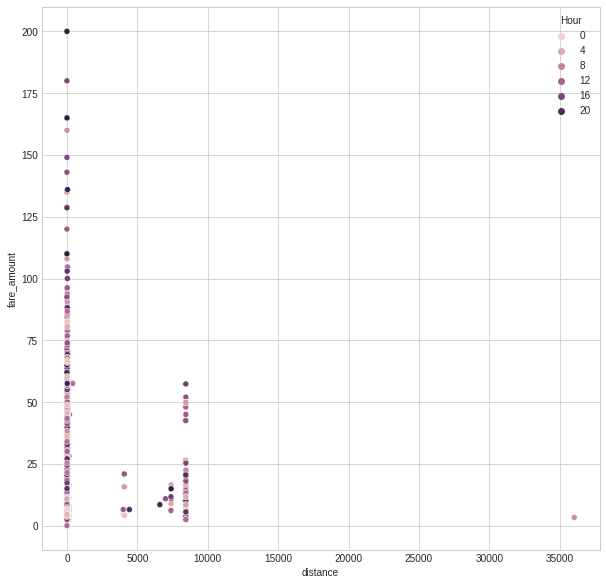

In [31]:
##Fair Vs distance plot( Colored by Trip Start Hour )
plt.figure(figsize=(10, 10))
sns.scatterplot(x=subset_train['distance'], y=subset_train['fare_amount'], hue=subset_train['Hour'].astype(int))

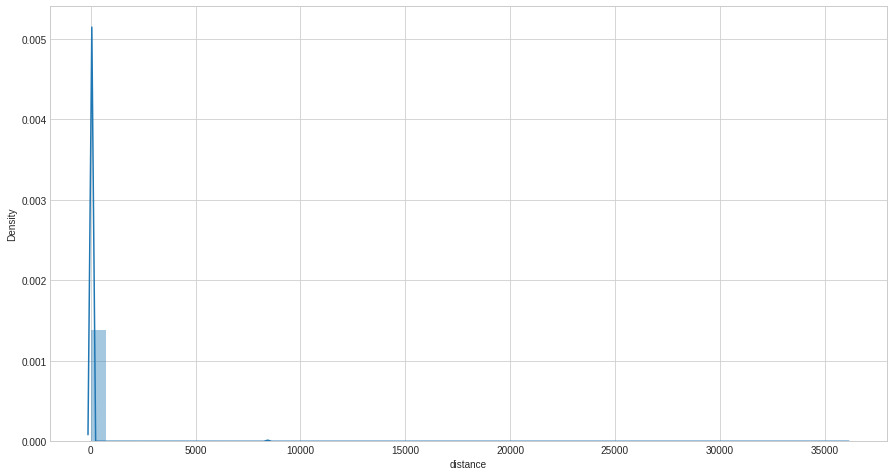

In [32]:
plt.figure(figsize=(15, 8))
sns.distplot(subset_train['distance'])

# Test  Train Split:

In [39]:
# create copy of the data set
df_train = subset_train.drop(columns= ['key','pickup_datetime', 'EDTdate'], axis= 1).copy()
print(df_train.shape)


(49991, 11)


In [40]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount', axis=1),
                                                    df_train['fare_amount'], test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39992, 10)
(9999, 10)
(39992,)
(9999,)


# XGBoost Model:

In [34]:
import xgboost as xgb

In [35]:
params = {
   
    'max_depth': 7,
    'gamma' :0,
    'eta':.03, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

In [41]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=5000, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[17:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:14.368
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:14.0076
[2]	test-rmse:13.6366
[3]	test-rmse:13.2776
[4]	test-rmse:12.931
[5]	test-rmse:12.5955
[6]	test-rmse:12.2708
[7]	test-rmse:11.9581
[8]	test-rmse:11.6563
[9]	test-rmse:11.3645
[10]	test-rmse:11.0826
[11]	test-rmse:10.8104
[12]	test-rmse:10.5622
[13]	test-rmse:10.3075
[14]	test-rmse:10.0617
[15]	test-rmse:9.82479
[16]	test-rmse:9.59654
[17]	test-rmse:9.37632
[18]	test-rmse:9.16473
[19]	test-rmse:8.96015
[20]	test-rmse:8.76306
[21]	test-rmse:8.57403
[22]	test-rmse:8.39151
[23]	test-rmse:8.21713
[24]	test-rmse:8.04822
[25]	test-rmse:7.88698
[26]	test-rmse:7.73086
[27]	test-rmse:7.58156
[28]	test-rmse:7.43961
[29]	test-rmse:7.3008
[30]	test-rmse:7.16772
[31]	test-rmse:7.03982
[32]	test-rmse:6.91923
[33]	test-rmse:6.80326
[34]	test-rmse:6.69091
[35]	test-rmse:6.58394
[